In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scienceplots

# Set the style globally
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use(['notebook'])

In [2]:
# Read in .dat file
path = '../data/occupancy_data/1D_2_2_1_0.000100_1.000000_8.000000_1000_Pn-mA1_1970_square.dat'
occ_data = pd.read_csv(path, sep='\s+')
for c in occ_data.columns.values:
    occ_data[c] = occ_data[c].apply(lambda x: float(str(x).split(':')[0]))

# Convert pandas DataFrame to numpy array
occ_data = np.array(occ_data)

# Create empty array to fill with arrays to separate measurement moments
normal_occ_data = np.empty(0)

# Loop through to append each measurement moment with site1, site2, & site3 normalized occupancies
for i in range(len(occ_data)):
    normal_occ_data = np.append(normal_occ_data, occ_data[i]/np.sum(occ_data[i]))

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/70/dpchvndd0rdgb5qvz1j_ks240000gn/T/ipykernel_29433/229101212.py:3: SyntaxWarning: invalid escape sequence '\s'
  occ_data = pd.read_csv(path, sep='\s+')


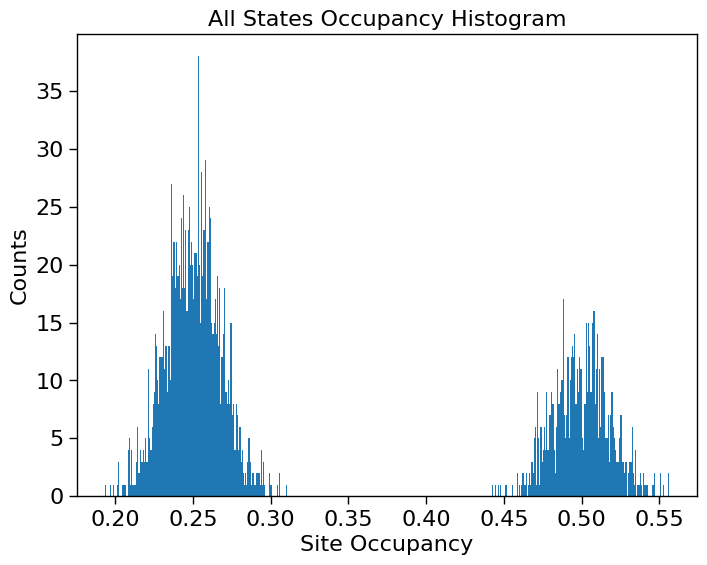

In [3]:
# Create histogram for all states and their occupancies
fig, ax = plt.subplots()
ax.hist(normal_occ_data, bins=500)
ax.set_xlabel('Site Occupancy')
ax.set_ylabel('Counts')
ax.set_title('All States Occupancy Histogram')
plt.show()

In [4]:
# Write pseudo-function for finding indices to split the array into several arrays for each measurement instance
split_indices = np.empty(0)
for i in range(int(len(normal_occ_data)/3) - 1):
    split_indices = np.append(split_indices, 3*i + 3)
split_indices = np.array(split_indices, dtype=int)

In [5]:
# Split this array into separate arrays within, each corresponding to different moments of measurements
normal_occ_data_sep = np.split(normal_occ_data, split_indices)

In [6]:
# Loop to separate the measurements from each site
site1 = np.empty(0)
site2 = np.empty(0)
site3 = np.empty(0)

for i in range(len(normal_occ_data_sep)):
    site1 = np.append(site1, normal_occ_data_sep[i][0])
    site2 = np.append(site2, normal_occ_data_sep[i][1])
    site3 = np.append(site3, normal_occ_data_sep[i][2])

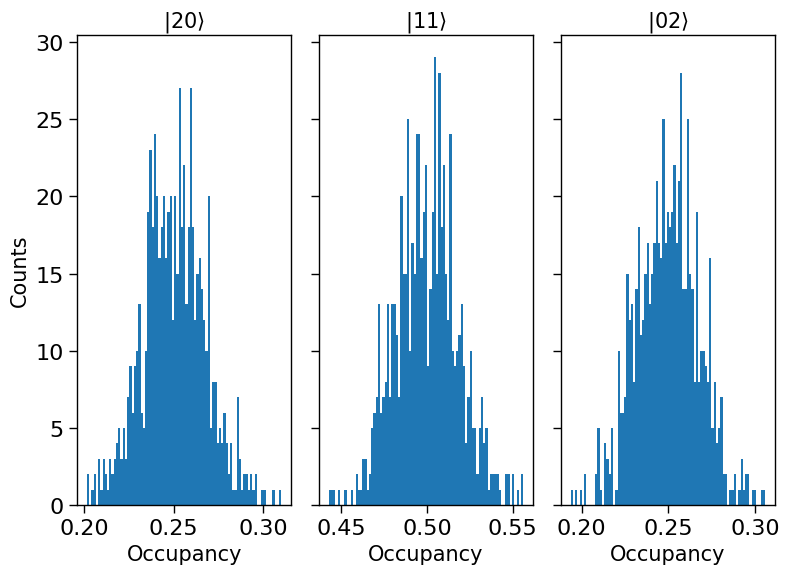

In [7]:
# Make separate subplots for counts of each respective sites occupancies
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, tight_layout=True)
ax1.hist(site1, bins=int(len(site1)/8))
ax2.hist(site2, bins=int(len(site2)/8))
ax3.hist(site3, bins=int(len(site3)/8))

ax1.locator_params(axis='x', nbins=4)

ax1.set_xlabel('Occupancy', fontsize=15)
ax1.set_ylabel('Counts', fontsize=15)
ax1.set_title(r'$|20\rangle$', fontsize=15)
ax2.set_xlabel('Occupancy', fontsize=15)
ax2.set_title(r'$|11\rangle$', fontsize=15)
ax3.set_xlabel('Occupancy', fontsize=15)
ax3.set_title(r'$|02\rangle$', fontsize=15)
fig.suptitle('')
plt.savefig('../graphs/sep_occ_hist_U_0.0001.png')
plt.show()

In [8]:
# Find the average occupancy for each site
site1_avg = np.sum(site1)/len(site1)
site2_avg = np.sum(site2)/len(site2)
site3_avg = np.sum(site3)/len(site3)

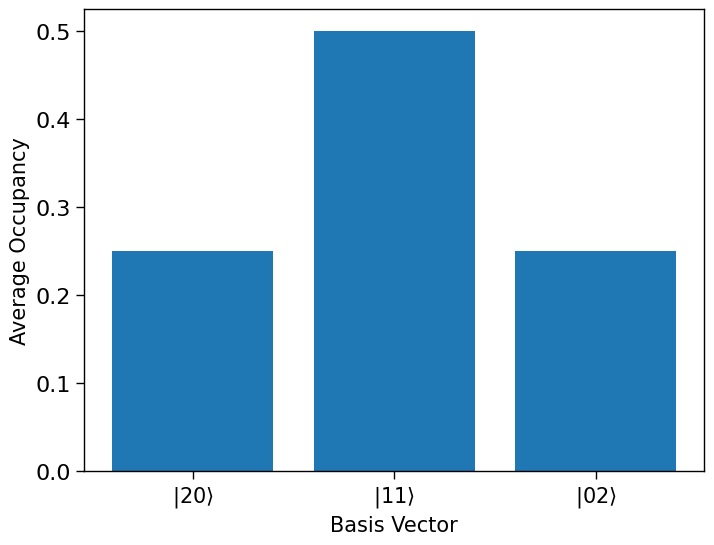

In [9]:
# Make a bar plot for the average occupancy of each site/basis vector
my_dict = {r'$|20\rangle$' : site1_avg, r'$|11\rangle$' : site2_avg, r'$|02\rangle$' : site3_avg}
x = np.arange(len(my_dict.values()))

fig, ax = plt.subplots()
ax.bar(x, my_dict.values())
ax.set_xticks(x)
ax.set_xticklabels(my_dict.keys(), fontsize=15)
ax.set_xlabel('Basis Vector', fontsize=15)
ax.set_ylabel('Average Occupancy', fontsize=15)
# ax.set_title('Spatial Average Occupancies for $U=10$')
plt.savefig('../graphs/spatial_avg_occ_U_0.0001.png')
plt.show()

# Kinetic and Potential Energy Calculations

In [10]:
# Read in files and separate K and U into their own arrays
def get_K(path):
    # Read in .dat file
    K_file = pd.read_csv('../Data/energy_data/' + path, sep=' ')
    # Convert pandas DataFrame to numpy array
    K_data = np.array(K_file, dtype='float').T
    return K_data

def get_U(path):
    U_file = pd.read_csv('../Data/energy_data/' + path, sep=' ')
    U_data = np.array(U_file, dtype='float').T
    return U_data

K_files = np.array(['1D_2_2_1_0.000100_0.500000_8.000000_1000_K_1970_square.dat', '1D_2_2_1_1.000000_0.500000_8.000000_1000_K_1970_square.dat', '1D_2_2_1_2.000000_0.500000_8.000000_1000_K_1970_square.dat', '1D_2_2_1_3.000000_0.500000_8.000000_1000_K_1970_square.dat', '1D_2_2_1_4.000000_0.500000_8.000000_1000_K_1970_square.dat', '1D_2_2_1_5.000000_0.500000_8.000000_1000_K_1970_square.dat', '1D_2_2_1_6.000000_0.500000_8.000000_1000_K_1970_square.dat', '1D_2_2_1_7.000000_0.500000_8.000000_1000_K_1970_square.dat', '1D_2_2_1_8.000000_0.500000_8.000000_1000_K_1970_square.dat', '1D_2_2_1_9.000000_0.500000_8.000000_1000_K_1970_square.dat', '1D_2_2_1_10.000000_0.500000_8.000000_1000_K_1970_square.dat'])
U_files = np.array(['1D_2_2_1_0.000100_0.500000_8.000000_1000_V_1970_square.dat', '1D_2_2_1_1.000000_0.500000_8.000000_1000_V_1970_square.dat', '1D_2_2_1_2.000000_0.500000_8.000000_1000_V_1970_square.dat', '1D_2_2_1_3.000000_0.500000_8.000000_1000_V_1970_square.dat', '1D_2_2_1_4.000000_0.500000_8.000000_1000_V_1970_square.dat', '1D_2_2_1_5.000000_0.500000_8.000000_1000_V_1970_square.dat', '1D_2_2_1_6.000000_0.500000_8.000000_1000_V_1970_square.dat', '1D_2_2_1_7.000000_0.500000_8.000000_1000_V_1970_square.dat', '1D_2_2_1_8.000000_0.500000_8.000000_1000_V_1970_square.dat', '1D_2_2_1_9.000000_0.500000_8.000000_1000_V_1970_square.dat', '1D_2_2_1_10.000000_0.500000_8.000000_1000_V_1970_square.dat'])

K_data = np.zeros(0)
U_data = np.zeros(0)

for file_path in K_files:
    K_data = np.append(K_data, get_K(file_path))
for file_path in U_files:
    U_data = np.append(U_data, get_U(file_path))
    
# Find average kinetic energy
K_avg = np.sum(K_data)/len(K_data)
print('The average kinetic energy is: ', K_avg)
K_split = np.split(K_data, 11)

# Find average potential energy
U_avg = np.sum(U_data)/len(U_data)
print('The average potential energy is: ', U_avg)
U_split = np.split(U_data, 11)

U_value = np.array([0.0001, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

K_split_avg = np.zeros(0)
U_split_avg = np.zeros(0)

for i in range(len(K_split)):
    K_split_avg = np.append(K_split_avg, np.sum(K_split[i]/len(K_split[i])))
for i in range(len(U_split)):
    U_split_avg = np.append(U_split_avg, np.sum(U_split[i]/len(U_split[i])))

The average kinetic energy is:  -1.325684113865932
The average potential energy is:  0.43267205684113863


In [11]:
# x represents U/J
x = np.linspace(0, 10, 11)

α = γ = 2 / np.sqrt((x**2) + (x*np.sqrt(x**2 + 16)) + 16)
β = (x + np.sqrt(x**2 + 16))/(2*np.sqrt(2))*α


H_K = np.array([[0, -np.sqrt(2), 0],
              [-np.sqrt(2), 0, -np.sqrt(2)],
              [0, -np.sqrt(2), 0]])

H_P = np.array([[x, np.zeros_like(x), np.zeros_like(x)],
               [np.zeros_like(x), np.zeros_like(x), np.zeros_like(x)],
               [np.zeros_like(x), np.zeros_like(x), x]])

gs = np.array([α, β, γ])

K = np.zeros(0)
U = np.zeros(0)

for j in range(len(x)):
    K = np.append(K, np.array([gs.conj().T[j][0], gs.conj().T[j][1], gs.conj().T[j][2]] @ H_K @ np.array([gs[0][j], gs[1][j], gs[2][j]])))
        
for i in range(len(x)):
    U = np.append(U, np.array([gs.conj().T[i][0], gs.conj().T[i][1], gs.conj().T[i][2]]) @ np.array([[H_P[0][0][i], H_P[0][1][i], H_P[0][2][i]], [H_P[1][0][i], H_P[1][1][i], H_P[1][2][i]], [H_P[2][0][i], H_P[2][1][i], H_P[2][2][i]]]) @ np.array([gs[0][i], gs[1][i], gs[2][i]]))

K_ensemble_avg = np.sum(K)/len(K)
U_ensemble_avg = np.sum(U)/len(U)

print('The ensemble average kinetic energy is: ', K_ensemble_avg)
print('The ensemble average potential energy is: ', U_ensemble_avg)

The ensemble average kinetic energy is:  -1.3221733440683259
The ensemble average potential energy is:  0.43617153984863166


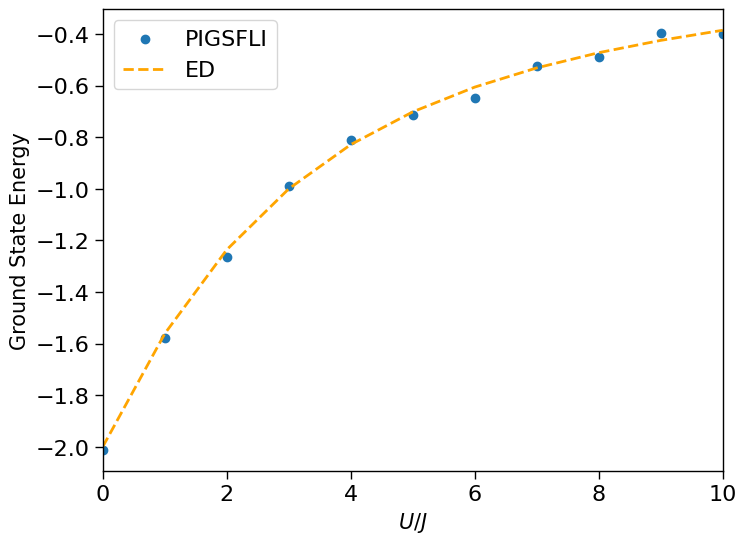

In [12]:
# Total ground state energy
plt.scatter(U_value, U_split_avg + K_split_avg, label='PIGSFLI')
plt.plot(U_value, U + K, label='ED', c='orange', ls='--')
plt.xlabel('$U/J$', fontsize=15)
plt.ylabel('Ground State Energy', fontsize=15)
plt.xlim(0, 10)
plt.legend(loc='best')
plt.savefig('../graphs/total_energy.png')
plt.show()

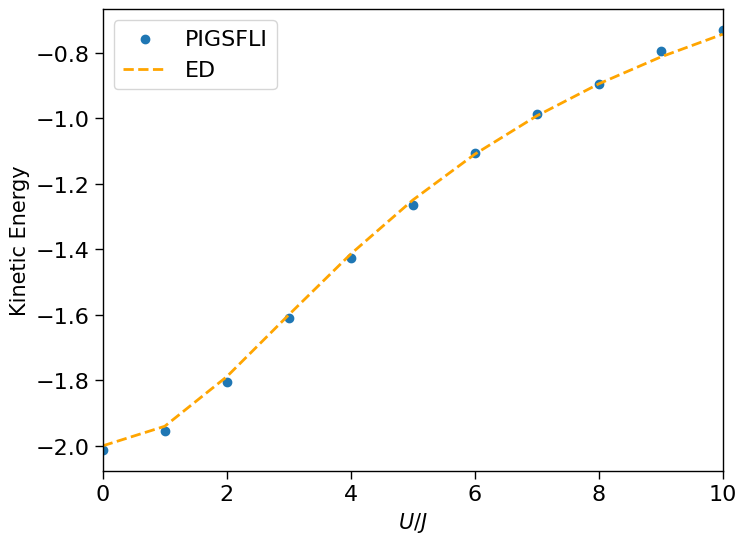

In [13]:
plt.scatter(U_value, K_split_avg, label='PIGSFLI')
plt.plot(x, K, label='ED', ls='--', c='orange')
plt.xlabel('$U/J$', fontsize=15)
plt.xlim(0, 10)
plt.ylabel('Kinetic Energy', fontsize=15)
plt.legend(loc='best')
plt.savefig('../graphs/kinetic_energy.png')
plt.show()

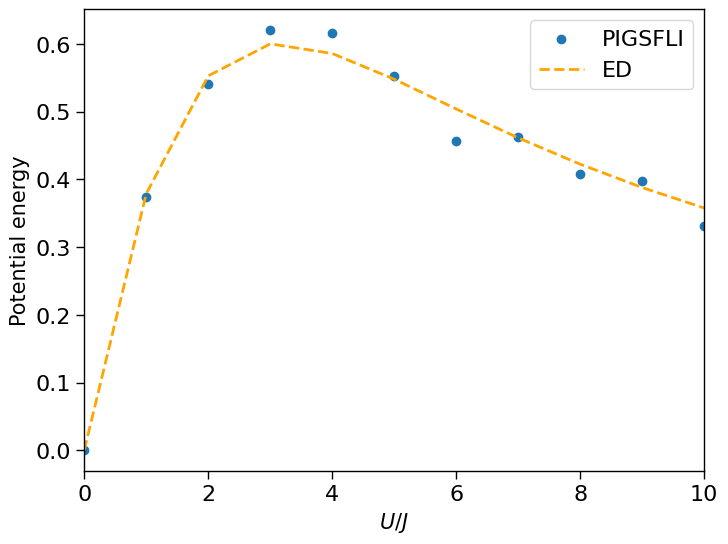

In [14]:
plt.scatter(U_value, U_split_avg, label='PIGSFLI')
plt.plot(x, U, label='ED', ls='--', c='orange')
plt.xlabel('$U/J$', fontsize=15)
plt.xlim(0, 10)
plt.ylabel('Potential energy', fontsize=15)
plt.legend(loc='best')
plt.savefig('../graphs/potential_energy.png')
plt.show()

# SWAP Entanglement Entropy

In [15]:
# Read in data files and put entanglement and error into their own arrays
def entanglement_measure(path):
    # Read in .dat file
    entropy_data = pd.read_csv('../Data/' + path, sep=' ', skiprows=1)
    # Convert pandas DataFrame to numpy array
    entropy_data = np.array(entropy_data, dtype='float').T
    entropy_measure = entropy_data[1]
    entropy_err = entropy_data[2]
    return entropy_measure, entropy_err

files = np.array(['U_0.0001/1D_2_2_1_0.000100_1.000000_betas_1000_S2.dat', 'U_1/1D_2_2_1_1.000000_1.000000_betas_1000_S2.dat', 'U_2/1D_2_2_1_2.000000_1.000000_betas_1000_S2.dat', 'U_3/1D_2_2_1_3.000000_1.000000_betas_1000_S2.dat', 'U_4/1D_2_2_1_4.000000_1.000000_betas_1000_S2.dat', 'U_5/1D_2_2_1_5.000000_1.000000_betas_1000_S2.dat', 'U_6/1D_2_2_1_6.000000_1.000000_betas_1000_S2.dat', 'U_7/1D_2_2_1_7.000000_1.000000_betas_1000_S2.dat', 'U_8/1D_2_2_1_8.000000_1.000000_betas_1000_S2.dat', 'U_9/1D_2_2_1_9.000000_1.000000_betas_1000_S2.dat', 'U_10/1D_2_2_1_10.000000_1.000000_betas_1000_S2.dat'])

entanglements = np.empty(0)
entanglement_errs = np.empty(0)

for file_path in files:
    entanglements = np.append(entanglements, entanglement_measure(file_path)[0][0])
    entanglement_errs = np.append(entanglement_errs, entanglement_measure(file_path)[1][0])
    
U = np.array([0.0001, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

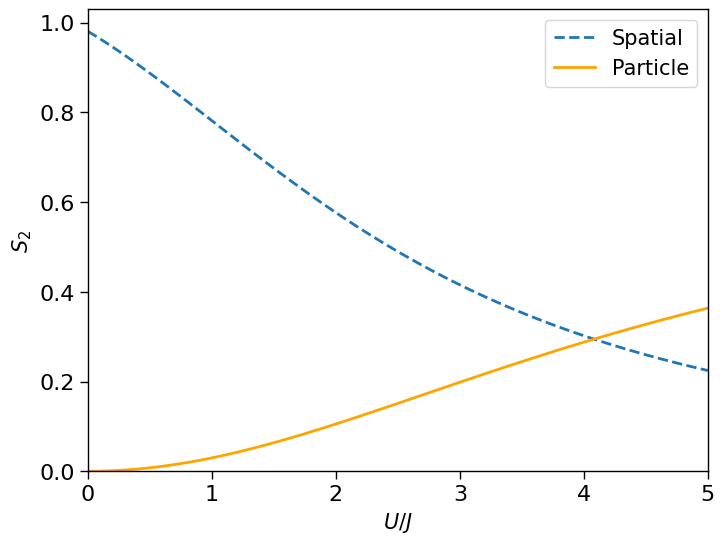

In [16]:
# x represents U/J
x = 0.5*np.linspace(0, 10, 100)

α = γ = 2 / np.sqrt(((x)**2) + ((x)*np.sqrt((x)**2 + 16)) + 16)
β = (x + np.sqrt((x)**2 + 16))/(2*np.sqrt(2))*α

ρ_site = np.array([[α**2, np.zeros_like(α), np.zeros_like(α)],
              [np.zeros_like(α), β**2, np.zeros_like(α)],
              [np.zeros_like(α), np.zeros_like(α), γ**2]])

eigen_pos = (1 + 2*np.sqrt(-4*α**4 + 2*α**2))/2
eigen_neg = (1 - 2*np.sqrt(-4*α**4 + 2*α**2))/2

ρ_particle = np.array([[eigen_pos, np.zeros_like(eigen_pos)],
                      [np.zeros_like(eigen_pos), eigen_neg]])

def S_2(ρ):
    return -np.log(np.trace(ρ**2))

plt.plot(x, S_2(ρ_site), label='Spatial', ls='--')
plt.plot(x, S_2(ρ_particle), label='Particle', ls='-', c='orange')
plt.xlim(0, 5)
plt.ylim(0,)
plt.xlabel('$U/J$', fontsize=15)
plt.ylabel('$S_2$', fontsize=15)
# plt.title('ED Renyi Entanglement Entropy as a Function of U/J')
plt.legend(fontsize=15)
plt.savefig('../graphs/ed_renyi.png')
plt.show()

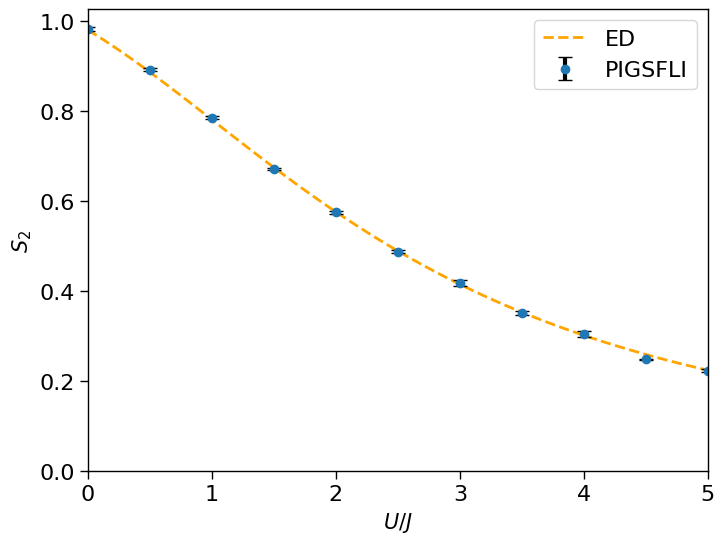

In [17]:
plt.plot(x, S_2(ρ_site), label='ED', ls='--', c='orange')
# plt.scatter(U/2, entanglements, label='PIGSFLI')
plt.errorbar(U/2, entanglements, yerr=entanglement_errs, ecolor='k', capsize=5, elinewidth=3, ls='none', marker='o', label='PIGSFLI')
plt.xlim(0, 5)
plt.ylim(0,)
plt.xlabel('$U/J$', fontsize=15)
plt.ylabel('$S_2$', fontsize=15)
# plt.title('Renyi Spatial Entanglement Entropy as a Function of U/J')
plt.legend(loc='best')
plt.savefig('../graphs/renyi_spatial.png')
plt.show()

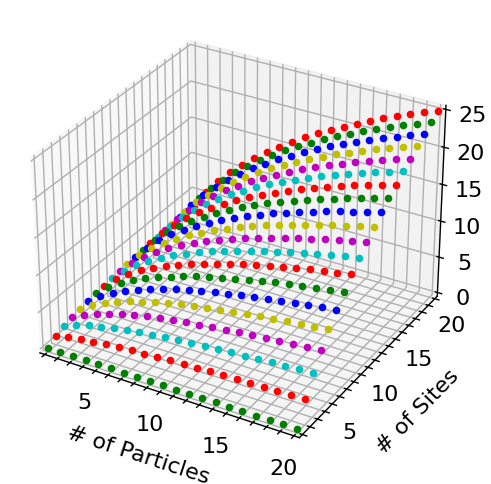

The size of the Hilbert Space for N=20 & L=20 is 68.92326441 billion.


In [18]:
plt.style.use(['science', 'notebook'])

# list of colors for plotting
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'b', 'g', 'r', 'c', 'm', 'y', 'b', 'g', 'r', 'c', 'm', 'y', 'b', 'g', 'r', 'c', 'm', 'y']

def hilbert_space_size(n, l):
    D = math.factorial(n + l - 1) / math.factorial(n) / math.factorial(l - 1)
    return D

N = np.linspace(1, 20, 20)
L = np.linspace(1, 20, 20)

fig = plt.figure()
fig.tight_layout()
ax = fig.add_subplot(projection='3d')

for i in range(len(N)):
    for j in range(len(L)):
        ax.scatter(N[i], L[j], np.log(hilbert_space_size(int(N[i]), int(L[j]))), c=colors[int(N[j])])

ax.set_xlabel(r'# of Particles', labelpad=10)
ax.set_ylabel(r'# of Sites', labelpad=10)
ax.set_zlabel(r'Size of Hilbert Space (log)', labelpad=10)
ax.set_xlim(1, 20)
ax.set_ylim(1, 20)
ax.set_zlim(0, 25)
plt.savefig('../graphs/hilbert_space_size', pad_inches=0.5)
# ax.set_zscale('')
plt.show()

# The size is the number of configs/dimensions
print(f"The size of the Hilbert Space for N=20 & L=20 is {hilbert_space_size(20, 20)*1e-9} billion.")